<a href="https://colab.research.google.com/github/estefanabermeo/Evaluacion/blob/main/Evaluacion_Pt3_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EVALUACIÓN PARTE 3 CALIFORNIA EUA**
#### Estefana Bermeo Severiano
#### A01367558

In [ ]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 

In [ ]:
#Carga desde un archivo .csv sin indice
eua= pd.read_csv("eua_limpio.csv", encoding = 'unicode_escape') 

In [ ]:
#Verificamos información del DataFrame
eua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_acceptance_rate                          6936 non-null   object 
 1   host_listings_count                           6936 non-null   int64  
 2   latitude                                      6936 non-null   float64
 3   longitude                                     6936 non-null   float64
 4   accommodates                                  6936 non-null   int64  
 5   bathrooms                                     6936 non-null   int64  
 6   bedrooms                                      6936 non-null   int64  
 7   beds                                          6936 non-null   int64  
 8   price                                         6936 non-null   int64  
 9   minimum_nights                                6936 non-null   i

In [ ]:
#Imprimo los primeros 5 registro del dataframe
eua.head()

,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,bathrooms_text,bedrooms.1,amenities,calendar_updated.1,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,100%,1,37.77028,-122.43317,3,0,1,2,202,2,...,1 bath,1,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",--,t,06/03/23,23/07/09,19/02/23,City Registration Pending,f
1,71%,2,37.74474,-122.42089,4,0,2,2,235,30,...,1 bath,2,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",--,t,06/03/23,03/05/09,06/08/17,0,f
2,73%,13,37.76555,-122.45213,1,0,1,1,56,32,...,4 shared baths,1,"[""Security cameras on property"", ""Host greets ...",--,t,06/03/23,08/09/14,27/10/22,0,f
3,0%,2,37.77564,-122.43642,4,0,2,2,575,9,...,1.5 baths,2,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",--,t,06/03/23,25/09/09,28/06/19,STR-0000264,f
4,90%,2,37.76030,-122.42197,3,0,1,1,110,1,...,1 private bath,1,"[""Paid parking garage off premises"", ""Luggage ...",--,t,06/03/23,01/08/09,25/02/23,STR-0000028,f


In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(eua)

   host_acceptance_rate  frequency  percentage  cumulative_perc
0                  100%       2252    0.324683         0.324683
1                    0%        922    0.132930         0.457612
2                   99%        540    0.077855         0.535467
3                   97%        451    0.065023         0.600490
4                   98%        258    0.037197         0.637687
..                  ...        ...         ...              ...
81                  27%          2    0.000288         0.999279
82                  22%          2    0.000288         0.999567
83                  48%          1    0.000144         0.999712
84                  21%          1    0.000144         0.999856
85                  45%          1    0.000144         1.000000

[86 rows x 4 columns]

----------------------------------------------------------------

  calendar_updated  frequency  percentage  cumulative_perc
0               --       6936         1.0              1.0

-----------------------

## **Variable 1: host_response_time**

In [ ]:
var1= freq_tbl(eua['host_response_time'])
var1

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,4221,0.608564,0.608564
1,within a few hours,1111,0.160179,0.768743
2,--,1019,0.146915,0.915657
3,within a day,452,0.065167,0.980825
4,a few days or more,133,0.019175,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes 
Filtro= var1[var1['frequency']>100]
Filtro

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,4221,0.608564,0.608564
1,within a few hours,1111,0.160179,0.768743
2,--,1019,0.146915,0.915657
3,within a day,452,0.065167,0.980825
4,a few days or more,133,0.019175,1.000000


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('host_response_time')
Filtro_index

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,4221,0.608564,0.608564
within a few hours,1111,0.160179,0.768743
--,1019,0.146915,0.915657
within a day,452,0.065167,0.980825
a few days or more,133,0.019175,1.000000


Text(0, 0.5, 'Frecuencia')

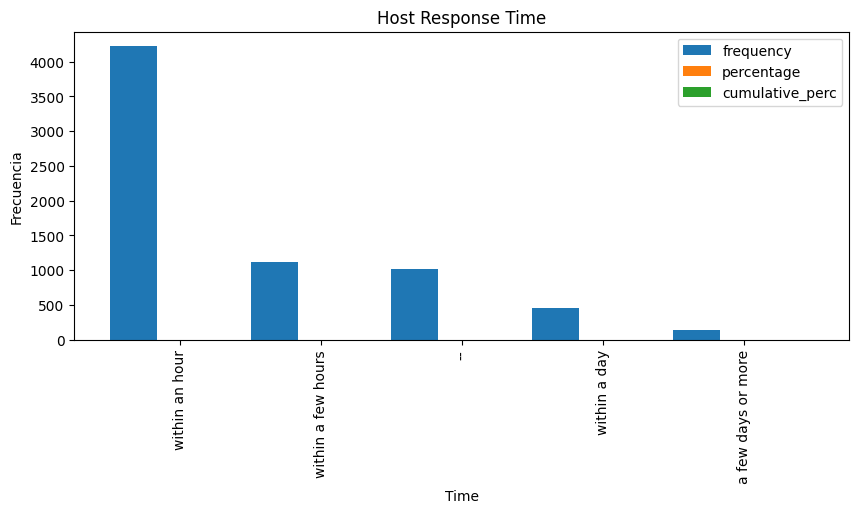

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Host Response Time')
plt.xlabel('Time')
plt.ylabel('Frecuencia')

<Axes: ylabel='frequency'>

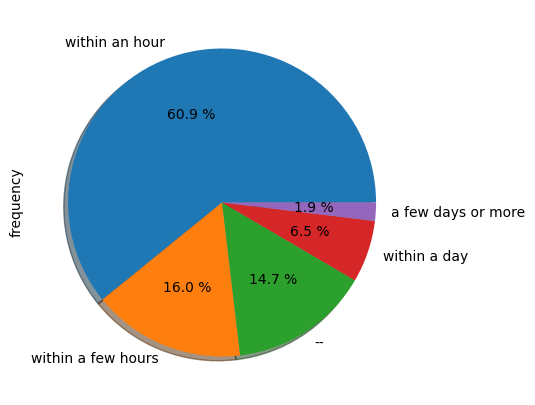

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variable 2: host_acceptance_rate**

In [ ]:
var2= freq_tbl(eua['host_acceptance_rate'])
var2

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,100%,2252,0.324683,0.324683
1,0%,922,0.132930,0.457612
2,99%,540,0.077855,0.535467
3,97%,451,0.065023,0.600490
4,98%,258,0.037197,0.637687
...,...,...,...,...
81,27%,2,0.000288,0.999279
82,22%,2,0.000288,0.999567
83,48%,1,0.000144,0.999712
84,21%,1,0.000144,0.999856


In [ ]:
#Obtengo un filtro de los valores más reelevantes 
Filtro2= var2[var2['frequency']>200]
Filtro2

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,100%,2252,0.324683,0.324683
1,0%,922,0.132930,0.457612
2,99%,540,0.077855,0.535467
3,97%,451,0.065023,0.600490
4,98%,258,0.037197,0.637687
5,91%,216,0.031142,0.668829


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index2= Filtro2.set_index('host_acceptance_rate')
Filtro_index2

,frequency,percentage,cumulative_perc
host_acceptance_rate,,,
100%,2252,0.324683,0.324683
0%,922,0.132930,0.457612
99%,540,0.077855,0.535467
97%,451,0.065023,0.600490
98%,258,0.037197,0.637687
91%,216,0.031142,0.668829


Text(0, 0.5, 'Frecuencia')

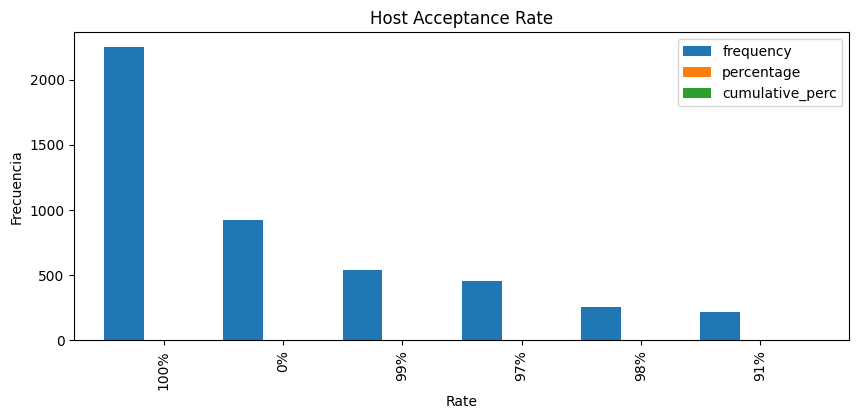

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index2.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Host Acceptance Rate')
plt.xlabel('Rate')
plt.ylabel('Frecuencia')

<Axes: ylabel='frequency'>

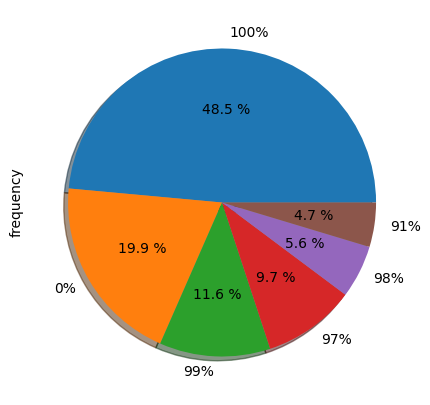

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index2["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variable 3: host_identity_verified**

In [ ]:
var3= freq_tbl(eua['host_identity_verified'])
var3

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,6106,0.880334,0.880334
1,f,830,0.119666,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes 
Filtro3= var3[var3['frequency']>1]
Filtro3

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,6106,0.880334,0.880334
1,f,830,0.119666,1.000000


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index3= Filtro3.set_index('host_identity_verified')
Filtro_index3

,frequency,percentage,cumulative_perc
host_identity_verified,,,
t,6106,0.880334,0.880334
f,830,0.119666,1.000000


Text(0, 0.5, 'Frecuencia')

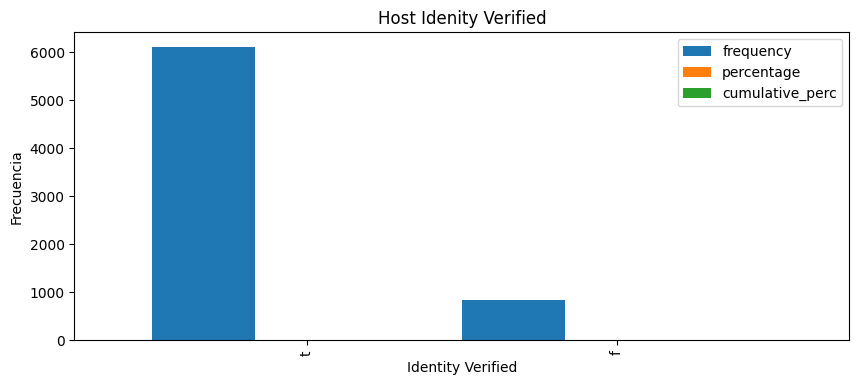

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index3.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Host Idenity Verified')
plt.xlabel('Identity Verified')
plt.ylabel('Frecuencia')

<Axes: ylabel='frequency'>

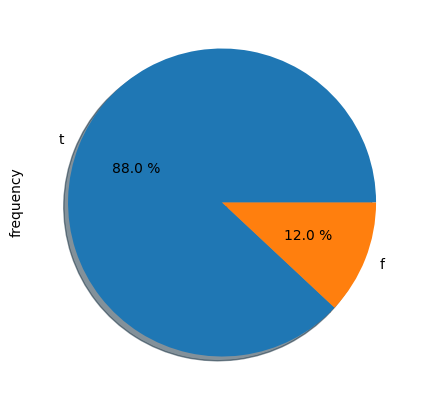

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index3["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variable 4: property_type**

In [ ]:
var4= freq_tbl(eua['property_type'])
var4

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,1848,0.266436,0.266436
1,Entire condo,879,0.126730,0.393166
2,Private room in home,853,0.122982,0.516148
3,Entire home,839,0.120963,0.637111
4,Entire guest suite,495,0.071367,0.708478
5,Private room in rental unit,471,0.067907,0.776384
6,Room in boutique hotel,352,0.050750,0.827134
7,Room in hotel,265,0.038206,0.865340
8,Private room in condo,192,0.027682,0.893022
9,Entire serviced apartment,145,0.020905,0.913927


In [ ]:
#Obtengo un filtro de los valores más reelevantes 
Filtro4= var4[var4['frequency']>400]
Filtro4

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,1848,0.266436,0.266436
1,Entire condo,879,0.126730,0.393166
2,Private room in home,853,0.122982,0.516148
3,Entire home,839,0.120963,0.637111
4,Entire guest suite,495,0.071367,0.708478
5,Private room in rental unit,471,0.067907,0.776384


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index4= Filtro4.set_index('property_type')
Filtro_index4

,frequency,percentage,cumulative_perc
property_type,,,
Entire rental unit,1848,0.266436,0.266436
Entire condo,879,0.126730,0.393166
Private room in home,853,0.122982,0.516148
Entire home,839,0.120963,0.637111
Entire guest suite,495,0.071367,0.708478
Private room in rental unit,471,0.067907,0.776384


Text(0, 0.5, 'Frecuencia')

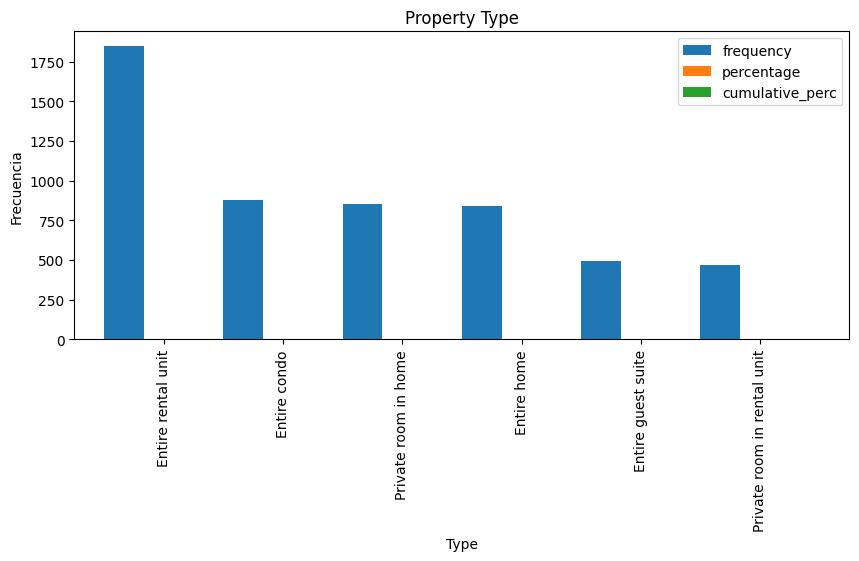

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index4.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Property Type')
plt.xlabel('Type')
plt.ylabel('Frecuencia')

<Axes: ylabel='frequency'>

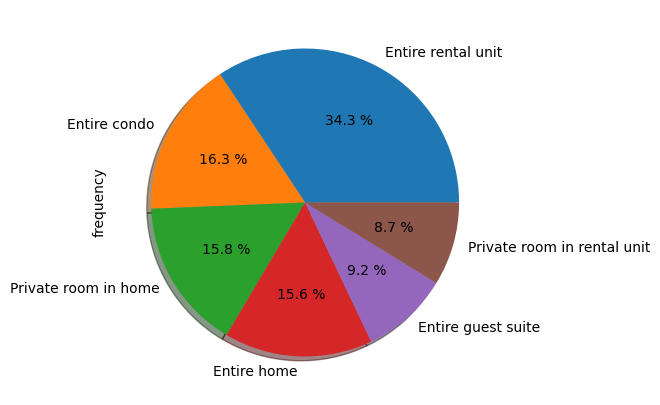

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index4["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

## **Variable 5: bathrooms_text**

In [ ]:
var5= freq_tbl(eua['bathrooms_text'])
var5

,bathrooms_text,frequency,percentage,cumulative_perc
0,1 bath,3329,0.479960,0.479960
1,1 private bath,1013,0.146050,0.626009
2,2 baths,844,0.121684,0.747693
3,1 shared bath,675,0.097318,0.845012
4,1.5 baths,290,0.041811,0.886822
5,1.5 shared baths,141,0.020329,0.907151
6,2.5 baths,128,0.018454,0.925606
7,3 baths,122,0.017589,0.943195
8,2 shared baths,85,0.012255,0.955450
9,5 shared baths,63,0.009083,0.964533


In [ ]:
#Obtengo un filtro de los valores más reelevantes 
Filtro5= var5[var5['frequency']>200]
Filtro5

,bathrooms_text,frequency,percentage,cumulative_perc
0,1 bath,3329,0.479960,0.479960
1,1 private bath,1013,0.146050,0.626009
2,2 baths,844,0.121684,0.747693
3,1 shared bath,675,0.097318,0.845012
4,1.5 baths,290,0.041811,0.886822


In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index5= Filtro5.set_index('bathrooms_text')
Filtro_index5

,frequency,percentage,cumulative_perc
bathrooms_text,,,
1 bath,3329,0.479960,0.479960
1 private bath,1013,0.146050,0.626009
2 baths,844,0.121684,0.747693
1 shared bath,675,0.097318,0.845012
1.5 baths,290,0.041811,0.886822


Text(0, 0.5, 'Frecuencia')

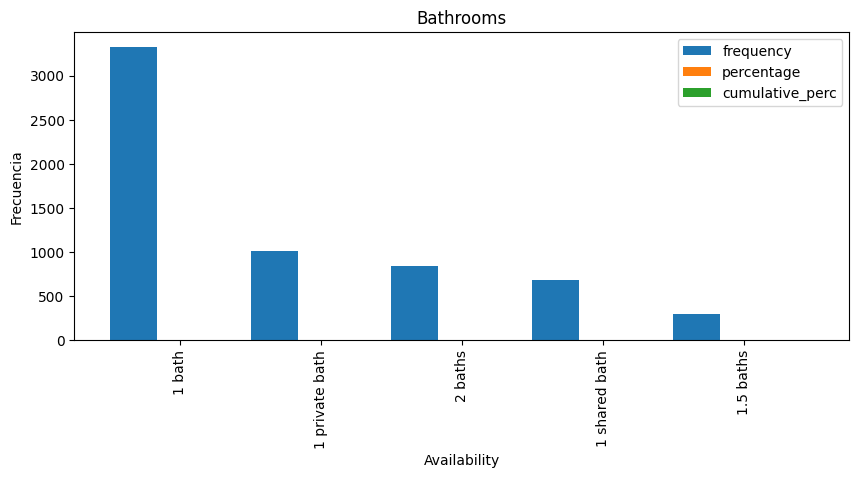

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index5.plot(kind = 'bar', width=1, figsize=(10,4))
plt.title('Bathrooms')
plt.xlabel('Availability')
plt.ylabel('Frecuencia')

<Axes: ylabel='frequency'>

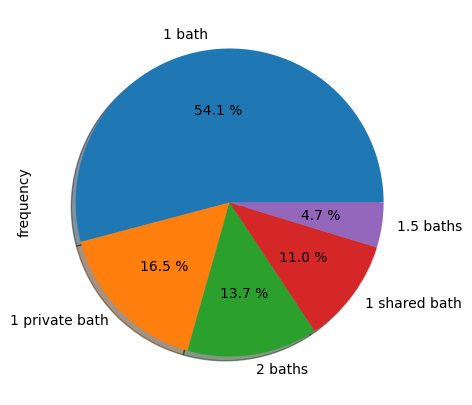

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index5["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")